# Risk Metrics



Risk measurement is a misnomer (can only be done for Knightian risk). Risk in financial markets cannot really be measured. It can only be estimated.

## Law of no Laws

Various economists have stated “laws” indicating how hard it is to get rigorous metrics to work in economics and finance – basically saying that the rule is that there are no rules!

* Goodhart’s Law (Charles Goodhart, Bank of England, 1974): “Any statistical relationship will break down when used for policy purposes”. When a measure becomes a target, it ceases to be a good measure.

* Jon Danielsson’s corollary (2002): “A risk model breaks down when used for its intended purpose”. The role of the risk forecaster is akin to a meteorologists job, who can forecast the weather, but not influence it. [But] if risk measurements influence people's behavior, it is inappropriate to assume market prices follow an independent stochastic process.

* Lucas critique (Nobel economics laureate Robert Lucas, 1976): Given that the structure of an econometric model consists of optimal decision rules of economic agents, and that optimal decision rules vary systematically with changes in the structure of series relevant to the decision maker, it follows that any change in policy will systematically alter the structure of econometric models.

Setting down rules or metrics about economic behavior encourages people to change their economic behavior. But consider the following statements: all humans have five fingers on each hand, except the ones who don’t. The vast majority of humans are five-fingered, so it’s not a bad start... for example if you’re a glove manufacturer.

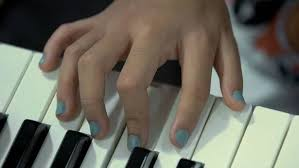


**George Box (1976): All models are wrong, but some are useful.**

All laws in mathematical finance have counterexamples, except this one. Mathematical finance should be made as rigorous as possible, but no more rigorous.


[QRPM R2.5] Portfolio insurance is an investment strategy that aims to allow an investor to participate in market up-moves and avoid some of the market's down-moves. Is portfolio insurance (a) procyclical or (b) countercyclical?

> Procyclical.

# Volatility

Neuroscience has identified brain regions that assess volatility. Some neural signals correlate with the size of prediction errors (PEs). Other neural signals encode the anticipated size of upcoming PEs, which means that they track risk. When uncertainty materializes, additional neural signals encode surprise, i.e., the extent to which the size of
the PE is greater or less than anticipated (Preuschoff et al., 2008). When a new piece of information is witnessed, activity levels reflect its salience for predicting future outcomes (Behrens 2007).

This is consistent with perhaps the two most widely used risk metrics: standard deviation and mean absolute deviation


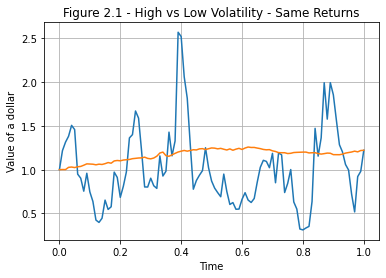

In [2]:
# Generate a high volatility and a low volatility price series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.dpi']= 300

x=np.arange(0,1.01,.01)
rng = np.random.default_rng(27182818)   #Use seed so repeatable
r1=rng.normal(loc=0.,scale=.3,size=100)
r2=rng.normal(loc=0.,scale=.01,size=100)
#Force both series to end up in the same place
r1+=.002-np.average(r1)
r2+=.002-np.average(r2)
#Start both series at a value of 1 and
#switch from log(pnew/pold-1) to pnew/pold-1
y1=np.append(np.array(1),np.exp(np.cumsum(r1)))
y2=np.append(np.array(1),np.exp(np.cumsum(r2)))
plt.title("Figure 2.1 - High vs Low Volatility - Same Returns")
plt.xlabel('Time')
plt.ylabel('Value of a dollar')
plt.grid()
plt.plot(x,y1)
plt.plot(x,y2);

[QRPM R2.6] What risk measure is detectable in human brain activity according to neuroscience?

> Any of "volatility," "standard deviation," "mean absolute deviation," or "prediction error" is acceptable.


## Standard deviation

$$\sigma = \sqrt{ \mathbb{E}[ (X-\mathbb{E}[X])^2 ]}$$

## MAD (mean absolute deviation)

$$MAD = \mathbb{E}[ |X-\mathbb{E}[X]| ]$$

In a normal distribution, $MAD = \sigma \sqrt{\frac{2}{\pi}} $. 

MAD gives less weight to outliers than standard deviation.



##  Downside semi-standard deviation:

A variant that only looks at subpar outcomes. Downside semi-variance or its square root, downside semi-standard deviation:

$$ \sigma_{down}^2 = \frac{ \int_{-\infty}^{\mu} (x-\mu)^2 dF(x)}{F(\mu)} $$


It may make sense for peril-type risk management. But not for venture-type risk management, e.g. 

- Distribution A: -5\%, -2\%, 2\%, 5\%
- Distribution B: -5\%, -2\%, .1\%, 6.9\%

Two distributions with 4 equally-likely outcomes. Both have zero average and the same downside semivariance (B has higher overall variance)

# Inter-p-tile range:

Another dispersion measure: 

$$ IR(p,F) = F^{-1}(1-p) - F^{-1}(p) $$ 

Popular ranges are interquartile (p=.25) and interdecile (p=.1), i.e. 80\% confidence interval around the median.

$$ IQR(F) = F^{-1}(.75) - F^{-1}(.25) $$ 

Fits nicely with “lack of information” definition of risk – the smaller IR is, the lessinformation we lack, i.e. the more confident we are that observations are close to median.


[QRPM R2.7] Which is bigger, a random variable's interquartile range or its interdecile range?

> Interdecile.

[QRPM P2.9]
For a Laplace distribution with pdf $f(x)=\frac{1}{2}exp(-\mid x\mid)$ and cdf $F(x)=\left\{\begin{matrix}\frac{1}{2}exp(x),\ \ x\le0\\1-\frac{1}{2}exp(-x),\ \ x\geq0\\\end{matrix}\right.$, for what value of $p<\frac{1}{2}$ is the inter-p-tile range the same as the mean absolute deviation?

> First figure out MAD. (Or can just look it up &mdash; it's the b parameter, which is one here.)
$$-\frac{1}{2}\int_{-\infty}^{0}{x\cdot exp(x)dx}+\frac{1}{2}\int_{0}^{\infty}{x\cdot exp(-x)dx}=-\frac{1}{2}(-1)+\frac{1}{2}(1)=1$$
> 
> Then figure out inverse cdf. For $x\leq0$, $y=F(x)=\frac{1}{2}exp(x)$, so $ln(2y)=x$, i.e. $F^{-1}(y)=ln(2y)$ for $y\le\frac{1}{2}$. Similarly for $x\geq0$, $y=F(x)=1-\frac{1}{2}exp(-x)$, so $-ln(2-2y)=x$, i.e. $F^{-1}(y)=-ln(2-2y)$ for $y\geq\frac{1}{2}$. 
Inter-p-tile range is $F^{-1}\left(1-p\right)-F^{-1}\left(p\right)$. Due to symmetry this is $-2F^{-1}\left(p\right)$, which we want to equal one. So $F^{-1}\left(p\right)=-\frac{1}{2}$, meaning $p=F(-\frac{1}{2})=\frac{1}{2}exp(-\frac{1}{2})\approx.303$.
> 
> Variant: Weibull distribution $exp(x-1)$ from $-\infty$ to $1$ instead of Laplace. $exp(x_h-1)=1-p$ gives $x_h=1+ln(1-p)$; similarly $x_l=1+ln(p)$ so the inter-p-tile range is $ln(1/p-1)$. $\int x*exp(x-1)dx=exp(x-1)(x-1)$, so the mean is zero. The absolute deviation from the mean is $-exp(x-1)(x-1)$ where x ranges from $-\infty$ to $0$ plus $exp(x-1)(x-1)$ where x ranges from $0$ to $1$. That gives $2exp(-1)$. $2exp(-1)=ln(1/p-1)$ when $p=\frac{1}{1+exp(2*exp(-1))}$.


[QRPM 2.10]
For a standard (mean zero, variance one) normal distribution, which is bigger: the mean absolute deviation, or the interdecile ($p={10}^{-1}$) range?

> MAD of a normal distribution is $\sqrt{2/\pi}\sigma$, which for $\sigma=1$ is just $\sqrt{2/\pi}<1$. We need to calculate $$F^{-1}\left(.9\right)-F^{-1}\left(.1\right)=2F^{-1}\left(.9\right)=-2F^{-1}\left(.1\right)$$ 
> A probability of $p={10}^{-1}$ is somewhere between $1$ and $2$ standard deviations, i.e. $-F^{-1}(.1)$ is somewhere between $1$ and $2$, so the interdecile range is somewhere between $2$ and $4$ and the interdecile range is bigger than MAD. (Actual is $2.56$.)


In [21]:
# [QRPM P2.10]
import numpy as np
import scipy.stats as spst
print("MAD of normal:",np.sqrt(2/np.pi))
print("Interdecile range:",-2.*spst.norm.ppf(.1))

MAD of normal: 0.7978845608028654
Interdecile range: 2.5631031310892007


# VaR, ES, cVaR, and Spectral Measures

Compressing all the information in the cdf $F(x)$ into a single number is not going to work... How bad can things get?

In a financial context, what's the most we can lose? Without limit to the imagination, extremes aren't very interesting or helpful. What's the most that we can lose in all but the most far-fetched circumstances? That leads to Value at Risk...

## VaR (Value at Risk)

If F(w) is the cdf of the financial quantity of interest, we look at $F(x)=1-p$ where $p$ is a confidence level (a percentile of a probability distribution of a financial quantity of interest).

$$ VaR_t(p) = - F_t^{-1} (1-p) $$

$$ VaR_t(p) = x   \Leftrightarrow   \int_{-\infty}^{-x} f_t(y) dy = 1 - p $$


e.g. for 99\% confidence, then 99\% VaR is the amount x where F(x)=.01; i.e. the (comparatively small) amount of wealth we will exceed 99\% of the time. 

## ES (Expected Shortfall)

Average of the "bad" VaRs  (Acerbi and Tasche, 2001):

$$ ES(p) = \frac{1}{1-p} \int_{p}^{1} VaR(z) dz $$

## cVaR (Conditional VaR)

Expected value conditional on the outcome being in the VaR tail of the distribution (Rockafellar and Uryasev, 2000):

$$ cVaR(p) = \mathbb{E} [ X | X \leq -VaR(p) ] = \frac{-1}{F(-VaR(p))} \int_{-\infty}^{-VaR(p)} y f(y) dy $$

For ES, the pdf is uniform. For cVaR, the pdf is the pdf of the random variable X.

For a normal distribution, cVaR equals ES.

[QRPM R2.1] Let $X$ be a continuous random variable representing log-returns of an investment, where X’s range is $[-\infty,\infty]$. For a given probability level $p$, which is bigger: $X$'s Value at Risk or its conditional Value at Risk?

> cVaR must be larger since it is the average of outcomes worse than VaR, and we are changing the sign.

[QRPM R2.3] Let $\text{VaR}(15/16)$ be $93.75\%$ Value At Risk of $4$ independent $50-50$ coin tosses that give you $\$10$ on heads and take $\$5$ from you on tails. What is $\text{VaR}(15/16)$?

> The precise definition is
$$\text{VaR}(p)=-\text{inf}(x\mid F(x)=Pr(X\le x)\ge 1-p)$$
So here $1-p=1/16$ which is the probability of 4 tails. At that point the lottery takes $\$20$, so $F(-\$20)=.0625$. The minus convention (since there are both positive and negative outcomes) makes $\text{VaR}(15/16)=+20$.

[QRPM P2.1]
Derive (without an engine) the VaR and cVaR of a standard Laplace distribution (density function $f\left(x\right)=\frac{1}{\sqrt{2}}\exp{(-\sqrt{2}\left|x\right|)}$. Assume the confidence level "p" is above $50\%$. What is the cVaR when $p=.99$?

> For $p>.5$ we are interested in negative values of $x$ in $f(x)$. So the density function of interest is $f\left(x\right)=\frac{1}{\sqrt{2}}\exp(\sqrt{2}x)$. 
>
> Integrating to get the cdf we have $F\left(x\right)=\frac{1}{2}\exp(\sqrt{2}x)$. So to find $VaR=-v$, we solve for $1-p=\frac{1}{2}\exp(\sqrt{2}v)$ and obtain $$VaR(p)=-v=-\frac{1}{\sqrt{2}}ln(2(1-p))$$
>
>Definition of cVaR:
$$cVaR\left(p\right)=\frac{-1}{1-p}\int_{-\infty}^{-VaR(p)}{y\ dF(y)}$$
($F(VaR)=1-p$ because continuous.) Plugging VaR into cVaR, we have
$$cVaR\left(p\right)=\frac{-1}{\sqrt{2}(1-p)}\int_{-\infty}^{\frac{1}{\sqrt{2}}\ln{\left(2(1-p)\right)}}{y\exp(\sqrt{2}y)dy}$$
Change of variable $t=\sqrt{2}y$ 
$$cVaR\left(p\right)=\frac{-1}{2\sqrt{2}(1-p)}\int_{-\infty}^{\ln{\left(2(1-p)\right)}}{t\exp(t)dt}$$
>
>Integral of $t*exp(t)$ is $exp(t)(t-1)$ (integrate by parts). At minus infinity this is zero. So we have
$$cVaR\left(p\right)=\frac{1-\ln{\left(2(1-p)\right)}}{\sqrt{2}}=\frac{1}{\sqrt{2}}+VaR(p)$$
>For example for $p=.99$, cVaR=$3.473$.


In [5]:
# [QRPM P2.1] Compute VaR, cVaR for Laplace distribution
import numpy as np
p=.99
VaR=-1/np.sqrt(2)*np.log(2*(1-p))
cVaR=1/np.sqrt(2)+VaR
print("VaR,cVaR",VaR,cVaR)

VaR,cVaR 2.766217995296019 3.4733247764825665


[QRPM P2.4]
For what $p>.65$ does $VaR_X(p)=VaR_Y(p)$, where $X$ is a standard (mean 0, variance 1) normal distribution and $Y$ is a Weibull distribution with cdf $$F(x)=\exp{\left(x-1\right)}$$
for $-\infty\le x\le1$? For what $p$ does ${cVaR}_X(p)={cVaR}_Y(p)$? Answer is numeric - you will need a calculation engine or a little Python code.

> VaR of a normal:
$$VaR_{Norm}(p)=-(\mu+\sigma Norm^{-1}(1-p))\tag{2.9}$$
For a standard normal that is
$$v={VaR}_{Norm}(p)=-{Norm}^{-1}(1-p)$$
(where the mean has been set to zero). Weibull is $F(x)=exp(x-1)$ so inverse Weibull is $ln(1-p)+1$, so (respecting the – sign convention)
$${VaR}_{Weibull}(p)=-ln(1-p)-1$$
We want to find the $p$ where
$$-ln(1-p)-1=-{Norm}^{-1}(1-p)$$
Numeric solution below: $p = .894942$. At this value, the common VaR is $1.253239$.
> 
> For cVaR, easier to use ES for the Weibull distribution – OK since it is continuous.
$$ES\left(p\right)=\frac{1}{1-p}\int_{p}^{1}VaR\left(y\right)dy=\frac{-1}{1-p}\int_{p}^{1}{(ln(1-y)+1)dy}=-ln(1-p)=VaR(p)+1$$
> 
> So we have as desired ES(p)=$cVaR(p)>VaR(p)$. cVaR in (2.10) is:
$$cVaR_{Norm}(p)=-\mu+\frac{-1}{1-p}\frac{1}{\sigma\sqrt{2\pi}}\int_{-\infty}^{-v}{y\exp\bigl(\frac{-y^2}{2\sigma^2}\bigr)dy}= \\
-\mu+\frac{\sigma}{(1-p)\sqrt{2\pi}}\exp\bigl(\frac{-v^2}{2\sigma^2}\bigr)
\tag{2.10}$$
For standard normal,
$$\frac{1}{(1-p)\sqrt{2\pi}}exp\left(\frac{-{({Norm}^{-1}(1-p))}^2}{2}\right)$$
> 
> Code below shows $p=.658847$. At this value the common cVaR is $1.075424$.

In [7]:
# [QRPM P2.4] Match normal and Weibull
import scipy.stats as spst
import scipy.optimize as scpo

def var_obj(p):
    norm_var=-spst.norm.ppf(1-p)
    wei_var=-np.log(1-p)-1
    return((norm_var-wei_var)**2)

var_answer=scpo.minimize_scalar(var_obj,bounds=(.65,1),method='bounded')
match_var_p=var_answer.x
match_var_var=-np.log(1-match_var_p)-1
print("Matching VaR p:",match_var_p,"Matching VaR VaR:",match_var_var)

def cvar_obj(p):
    norm_cvar=np.exp(-spst.norm.ppf(1-p)**2/2)/((1-p)*np.sqrt(2*np.pi))
    wei_cvar=-np.log(1-p)
    return((norm_cvar-wei_cvar)**2)

cvar_answer=scpo.minimize_scalar(cvar_obj,bounds=(.65,1),method='bounded')
match_cvar_p=cvar_answer.x
match_cvar_cvar=-np.log(1-match_cvar_p)
print("Matching cVaR p:",match_cvar_p,"Matching cVaR cVaR:",match_cvar_cvar)

Matching VaR p: 0.8949415993040702 Matching VaR VaR: 1.2532388863408
Matching cVaR p: 0.6588469519521818 Matching cVaR cVaR: 1.075424081134154


[QRPM P2.6]
A binomial distribution is a discrete distribution resulting from $n$ tosses of a coin with a probability $q$ of getting heads. The probability mass function is $$pmf(k)=\left(\begin{matrix}n\\k\\\end{matrix}\right)q^k{(1-q)}^{n-k}$$
i.e. $pmf(k)$ is the probability of getting $k$ heads, $k=0,\dots,n$. Write Python code to input the distribution parameters $n$ and $q$, as well as a confidence level $p$, and then output $VaR(p)$, $cVaR(p)$, and $ES(p)$ for this binomial distribution. Show $VaR(.99)$, $cVaR(.99)$, and $ES(.99)$ for $n=100,q=.5$. (Since all values are positive, you don’t need to use the sign-flipping convention.)

> Output:
> 
> ```
distribution parameter n:  100
distribution parameter q:  .5
confidence level p:  .99
 VaR = 38
cVaR = 36.78096893990069
  ES = 36.72131348035426
> ```
> 
> The 1% quantile of the distribution is between 37 and 38. Since VaR clicks up to 38, the limit on cVaR also goes up to 38. ES however ends exactly at VaR(.99) and so is a little less.


In [16]:
# [QRPM P2.6]
# Input n, q and p and compute cVaR(p) for a binomial distribution with parameters n and q.
import scipy.special as scisp

hardwired_answers = True   #False = allow user input
if hardwired_answers:
    n=100
    q=.5
    p=.99
else:
    inputs_bad=True # keep trying until inputs are all good

    while inputs_bad:
        n=input("distribution parameter n: ")
        q=input("distribution parameter q: ")
        p=input("confidence level p: ")

        n=int(n); q=float(q); p=float(p)
        inputs_bad=False
        if n<=0:
            print("n must be positive:",n)
            inputs_bad=True
        if (q<0) or (q>1):
            print("q must be between 0 and 1:",q)
            inputs_bad=True
        if (p<0) or (p>1):
            print("p must be between 0 and 1:",p)
            inputs_bad=True

#Use probability mass function C(n,k)q^k(1-q)^(n-k) at value k;
# k=0 to n. Keep adding mass until we get to 1-p.
#For expected shortfall, have to interpolate
cum_prob=0
cVaR=0; ES=0
for k in range(n):
    pmass=scisp.comb(n,k)*(q**k)*(1-q)**(n-k)
    cVaR+=k*pmass
    ES+=k*pmass
    cum_prob+=pmass
    if cum_prob >= 1-p:
        #we are at or past the VaR point
        VaR=k
        #If 1-p-cum_prob=pmass then no adjustment; otherwise adjust ES down
        ES+=k*(1-p-cum_prob)
        break

#Scale cVaR and ES differently
cVaR/=cum_prob
ES/=(1-p)
print(" VaR =",VaR)
print("cVaR =",cVaR)
print("  ES =",ES)

 VaR = 38
cVaR = 36.78096893990069
  ES = 36.72131348035426


## Spectral Measures of Risk

Extensions to the expected shortfall (Acerbi, 2002):
    
$$ SRM(w) = \int_{0}^{1} VaR(x) w(x) dx $$

When $w(x)=0$ for $x<p$ and $w(x)=1/(1-p)$ for $x \geq p$, $SRM(w) = ES(p)$.

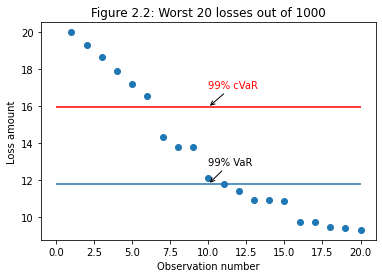

99% VaR is  11.781890699024686
99% cVaR is  15.949993320207135
99% interpolated VaR is  12.12450571944469
99% interpolated cVaR is  16.3625655225223


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as spst

# Generate some random numbers and show VaR and cVaR

# Generate 90% low vol, 10% high vol random numbers; this creates a fat-tailed distribution
trials=1000
rng = np.random.default_rng(314159)   #Use seed so repeatable
y=np.concatenate((rng.normal(0.,1.,int(.9*trials)), \
                  rng.normal(0.,10.,int(.1*trials))))
y.sort()  #Put them in order

p=.99
p100=p*100.
p_string="%0.0f"% p100

# Compute sample p-VaR; n=trials
# We assume there is probability mass = 1/(n+1) at each of the n observations.
# So the smallest observation has cumulative probability mass 1/(n+1) and
# the largest observation has cumulative probability mass n/(n+1)
# From (2.4) we want the smallest k such that
# k/(n+1) >= 1-p, i.e. k>=(n+1)(1-p)

breakpoint=(trials+1)*(1-p)
k=int(breakpoint)
# Python list convention is: first list element is index 0
# - So if breakpoint is an integer, decrement k
# - Otherwise leave it alone to get the next one up
if k==breakpoint:
    k-=1
VaRp=-y[k]

# Compute cVaR
# Standardization factor is (sum of probabilities <= VaRp). Here that's (k+1)/(n+1).
# As n->infinity that will get closer and closer to 1-p, but for the finite case
# it's a little off.
cVaRp=-np.sum(y[:k+1])/(k+1)

plt.scatter(range(1,21),-y[:20])
plt.annotate(p_string+"% VaR", xy=(10.0, VaRp), xytext=(10.0, VaRp+1),
            arrowprops=dict(arrowstyle='->',
                    facecolor='black'))
plt.hlines(VaRp,0,20)

plt.annotate(p_string+"% cVaR", xy=(10.0, cVaRp), xytext=(10.0, cVaRp+1),
            color='red', arrowprops=dict(arrowstyle='->',
                    facecolor='red'))
plt.hlines(cVaRp,0,20,colors='red')

plt.title('Figure 2.2: Worst 20 losses out of '+str(trials))
plt.xlabel('Observation number')
plt.ylabel('Loss amount')
plt.show();

pv_string=p_string+"% VaR is "
print(pv_string,VaRp)
pcv_string=p_string+"% cVaR is "
print(pcv_string,cVaRp)

# For comparison, generate VaR and cVaR with interpolation
# numpy percentile function does the wrong thing - assumes first observation
# is 0 percentile and last is 100th. Cure that by adding extra observations
# at each end.
z=np.insert(y,0,y[0]-1)
z=np.append(z,z[-1]+1)
VaRp_interp=-np.percentile(z,(1-p)*100)
# Compute sample p-cVaR without interpolation
nexceed=max(np.where(y<=-VaRp_interp)[0])
#-VaRp is (1-p) of the way between y[nexceed] and y[nexceed+1]
cVaRp_interp=-(np.sum([yy for yy in y if yy<=-VaRp_interp])-(1-p)*VaRp_interp)/ \
    (nexceed+2-p)
pv_string=p_string+"% interpolated VaR is "
print(pv_string,VaRp_interp)
pcv_string=p_string+"% interpolated cVaR is "
print(pcv_string,cVaRp_interp)

In [4]:
# Compute normal VaR and cVaR

# Get mean and standard deviation of the data
samp_mean=np.mean(y)
samp_std=np.std(y)

# Show normal VaR vs sample VaR
nVaRp=-(samp_mean+samp_std*spst.norm.ppf(1-p))
pv_string=p_string+"% Sample VaR is "
print(pv_string,VaRp)
pvn_string=p_string+"% Normal VaR is "
print(pvn_string,nVaRp)

# Get normal cVaR
ncVaRp=-samp_mean+samp_std*np.exp(-.5*(nVaRp/samp_std)**2)/((1-p)*np.sqrt(2*np.pi))
pcv_string=p_string+"% Sample cVaR is "
print(pcv_string,cVaRp)
pncv_string=p_string+"% Normal cVaR is "
print(pncv_string,ncVaRp)

99% Sample VaR is  11.781890699024686
99% Normal VaR is  7.5958778057456735
99% Sample cVaR is  15.949993320207135
99% Normal cVaR is  8.43350174708078


Everything can be gamed... But ES and cVaR are harder to game.

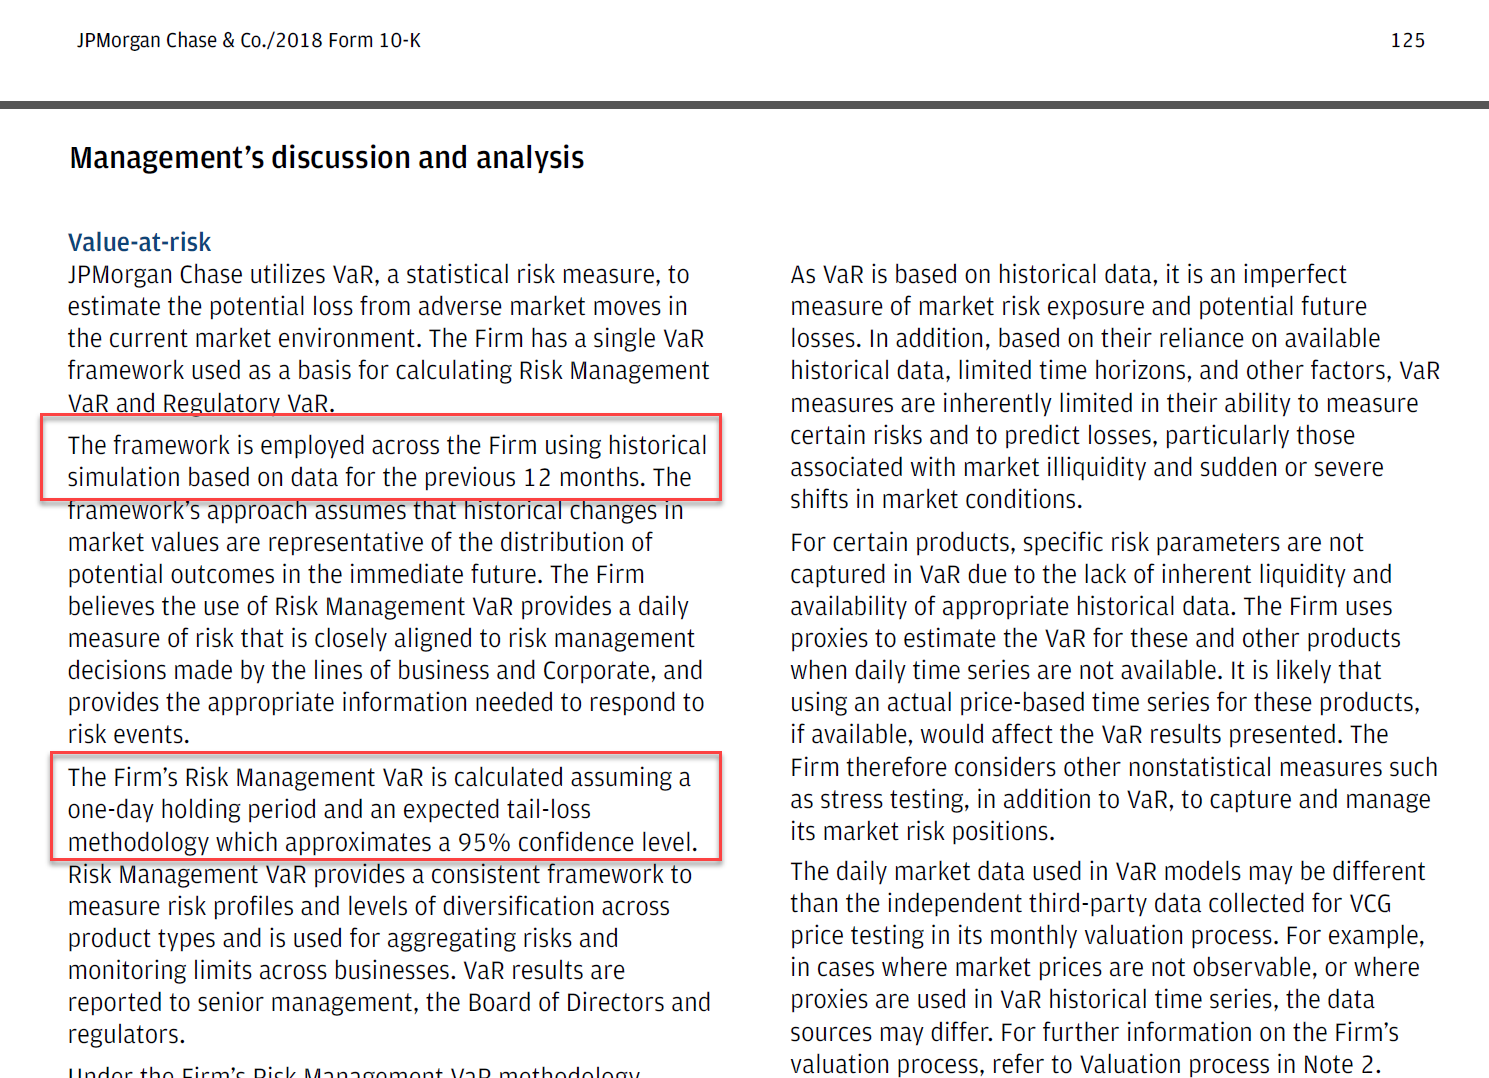

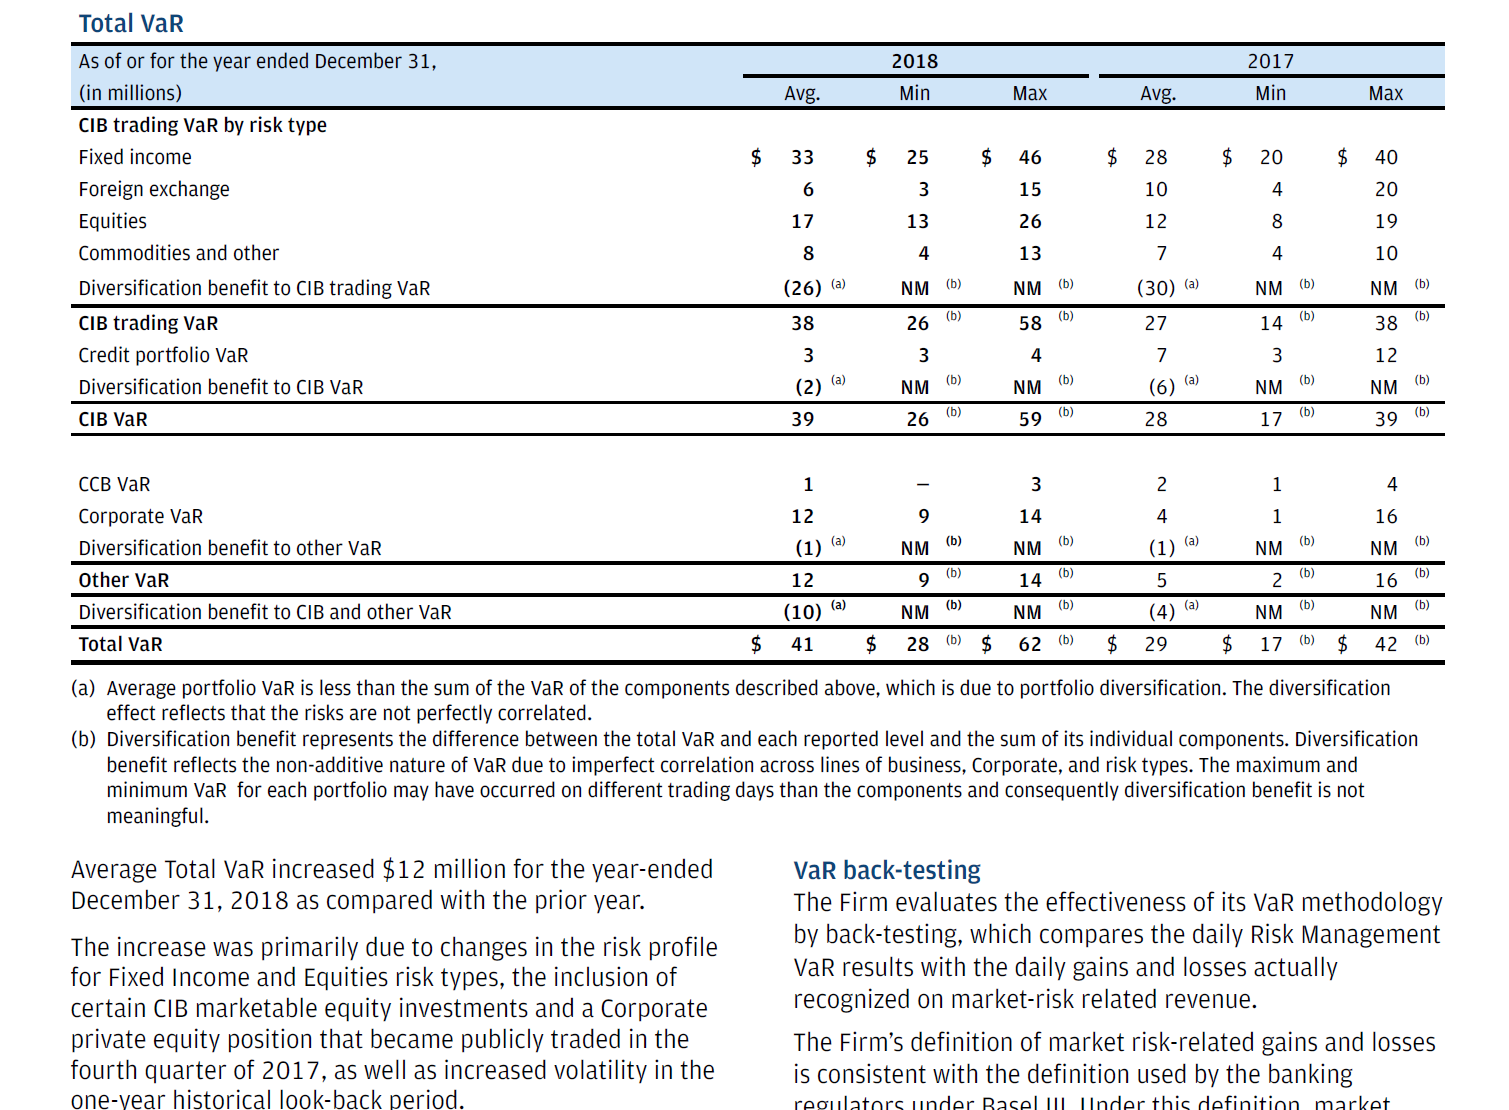

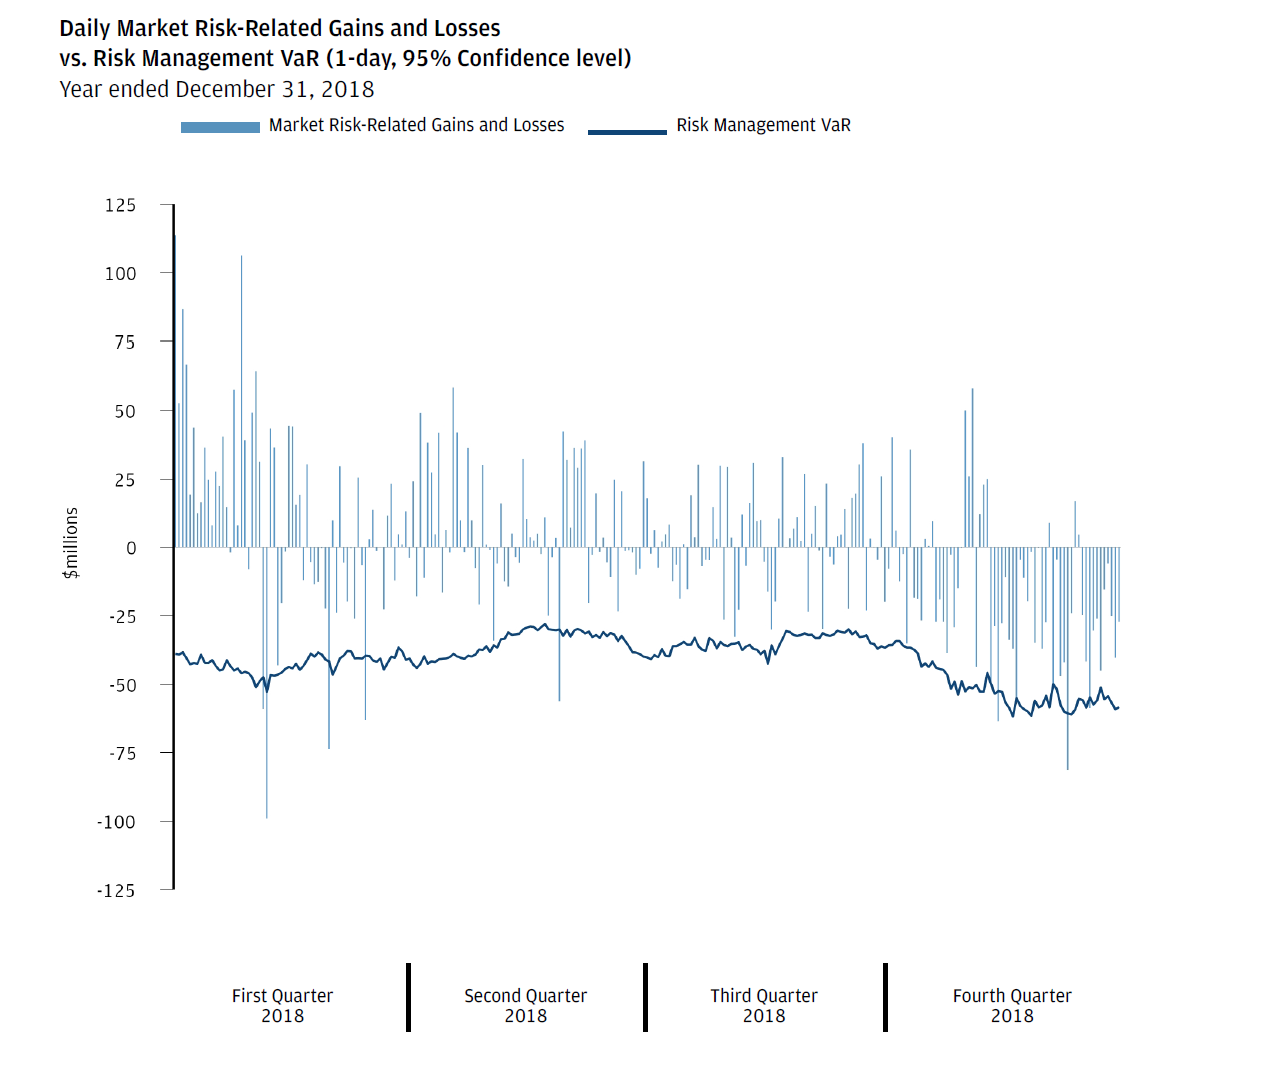

# Coherent Risk

Artzner, Delbaen, Eber and Heath (“ADEH”) defined “coherent risk” – set of axioms
about risk measures that (they claim) any reasonable risk measure should have

Their approach more accounting-oriented – basically risk is how much money you
need to have as a buffer in case you get into trouble. The more trouble you can get
into, the bigger buffer, the more risk...

More formally, ADEH defined a risk measure as a mapping from a random variable $X$
to the real numbers. $X$ could be an amount of money; a change in an amount of
money; or a rate of return. The sample space $\Omega$ (which ADEH assume is finite)
encompasses all relevant economic conditions one period forward.

Four axioms – like VNM, maybe not so strong. 

* Axiom T (Translation Invariance): $\rho(X+\alpha R_f) = \rho(X) - \alpha$. We can decrease our risk by adding cash to our portfolio. ADEH point out that this means $\rho(X+ \rho(X) R_f) = 0$, i.e. $\rho(X)$ is the amount of cash that will eliminate risk.

* Axiom S (Subadditivity): $\rho(X+Y) \leq \rho(X) + \rho(Y)$. Diversification helps, or at least doesn’t hurt, to reduce risk. ADEH note that if this were not true, entities (trading desks, banks, companies, portfolios) would be encouraged to split up into pieces to give the appearance of having less risk.

* Axiom PH (Positive Homogeneity): If $\lambda \geq 0$, then $\rho(\lambda X) = \lambda \rho(X)$. 
We know from Axiom S that $\rho(nX+Y) \leq n\rho(X)$. This says that equality holds, and fills in
between the integers. In effect this ignores liquidity risk which ADEH acknowledge;
they are focused on whether an amount of money is sufficient or not.

* Axiom M (Monotonicity): If $X \leq Y$, then $\rho(Y) \leq \rho(X)$. Here $X \leq Y$ means that the random variable $Y$ stochastically dominates the random variable $X$. So this axiom says that having more money is less risky than having less
money.

$R_f$ is risk-free asset, e.g. a very safe bank account, a US Treasury bill, or, in terms economists use, an “MMA” (money
market account).

The axioms of subadditivity and positive homogeneity are sometimes replaced by a single, weaker axiom:

* Axiom C (Convexity): If $1 \geq \lambda \geq 0$, then $\rho(\lambda X + (1- \lambda)Y) \leq \lambda \rho (X) + (1- \lambda) \rho (Y) $

A risk measure satisfying translation invariance, convexity, and monotonicity is called a convex risk measure.

NOTES: 

VaR is not subadditive. One A and one B is a better-diversified portfolio than two A's. However, the VaR measure encourages banks to double up on their low-probability bets (or triple up or quadruple up...).

You can’t hide problems in the tail with expected shortfall/cVaR – they get averaged in. ES/cVaR does the right thing. It can be shown that expected shortfall (and therefore cVaR when there is a differentiable cdf F) is a coherent risk measure.

[QRPM R2.4] One of the following is a coherent risk measure and the other is not: VaR (Value at Risk) and cVar (Conditional Value at Risk). Which is coherent? For the one that is not coherent, which of the coherent axioms fails?

> VaR is not coherent because it fails subadditivity, that is VaR(X+Y) can be more than VaR(X)+VaR(Y).


[QRPM P2.2]
Show that for continuous, differentiable underlying distributions, both VaR and cVaR satisfy the coherent properties: translation invariance, positive homogeneity, and monotonicity.

> For a continuous distribution,
$$VaR_t(p)=-F_t^{-1}(1-p);\hspace{2em}VaR_t(p)=x \iff \int_{-\infty}^{-x}f_t(y)dy=1-p\tag{2.5}$$
and
$$cVaR(p)=-\mathbb{E}\bigl[X | X\leq -VaR(p)\bigr]
=\frac{-1}{F\bigl(-VaR(p)\bigr)}\int_{-\infty}^{-VaR(p)}{yf(y)dy}\tag{2.7}$$
Differentiable means cVaR and ES are the same:
$$ES(p)=\frac{1}{1-p}\int_p^1{VaR(z)dz}\tag{2.6}$$
>
> Another approach for continuous differentiable variables for the monotonicity axiom is to note that $F_Y(z)\leq F_X(z)$ implies $F^{-1}_Y(p)\ge F^{-1}_X(p)$ for all probability levels $0\le p\le 1$. Among other things this means $\mathbb{E}[X]=\int_{-\infty}^\infty z f_X(z)dz=\int_0^1 F_X^{-1}(z)dz\le\int_0^1 F_Y^{-1}(z)dz=\mathbb{E}[Y]$.
>
> **Translation invariance**: Let $Z=X+a*R_f$ be the translated random variable. We want to prove $VaR_Z(p)=VaR_X(p)-a$; it's just a change of variable in the integral in (2.5), $z=y-a$ (with a little change in notation):
$$\int_{-\infty}^{-VaR_X(p)}f_X(y)dy=1-p=\int_{-\infty}^{-(VaR_X(p)-a)}f_X(z+a)dz
=\int_{-\infty}^{-(VaR_X(p)-a)}f_Z(z)dz$$
$f_X(z+a)$ is $f_Z(z)$, the pdf of $Z=X+a*R_f$. So this shows that $VaR_Z(p)=VaR_X(p)-a$.
>
> For a continuous distribution
$$cVaR_X(p)=\frac{-1}{1-p}\int_{-\infty}^{-VaR_X(p)}{yf_X(y)dy}$$
Doing the change of variable $z=y-a$:
$$cVaR_X(p)=\frac{-1}{1-p}\int_{-\infty}^{-VaR_Z(p)}{(z+a)f_Z(z)dz}$$
$$=\frac{-1}{1-p}\int_{-\infty}^{-VaR_Z(p)}{zf_Z(z)dz}-a=cVaR_Z(p)-a$$
>
> **Positive homogeneity**: Want to show $VaR_{kX}(p)=kVaR_X(p)$. Let $Z=kX$. Then cdfs are related as $F_Z(y)=F_X(y/k)$, so the pdfs are $f_Z(y)=f_X(y/k)/k$. So plug in to \eqref{eq:var_def} with change of variable $z=ky$:
$$\int_{-\infty}^{-VaR_X(p)}f_X(y)dy=1-p=\int_{-\infty}^{-kVaR_X(p)}f_X(z/k)d(z/k)
=\int_{-\infty}^{-kVaR_X(p)}f_Z(z)dz$$
So $VaR_{Z}(p)=kVaR_X(p)$ as desired.
>
> Same change of variable $z=ky$ works for cVaR:
$$cVaR_X(p)=\frac{-1}{1-p}\int_{-\infty}^{-VaR_X(p)}{yf_X(y)dy}$$
$$=\frac{-1}{1-p}\int_{-\infty}^{-kVaR_X(p)}{(z/k)f_X(z/k)(1/k)dz}$$
$$=\frac{-1}{1-p}\frac{1}{k}\int_{-\infty}^{-VaR_Z(p)}{zf_Z(z)dz}$$
$$=\frac{1}{k}cVaR_Z(p)$$
So $k*cVaR_X(p)=cVaR_Z(p)$ as desired.
>
> **Monotonicity**: Want to show that if $F_Y(z)\leq F_X(z)$ then $VaR_Y(p)\leq VaR_X(p)$. This is straightforward: if $F_Y(-v_Y)=1-p\leq F_X(-v_Y)$, then since $F_X$ is monotone increasing, there must be a $v_X\geq v_Y$ where $F_X(-v_X)=1-p$. So $VaR_Y(p)\leq VaR_X(p)$.
>
> For $cVaR$, use the equivalence with ES. Have already shown $VaR_X(z)\geq VaR_Y(z)$, so:
$$ES_X(p)=\frac{1}{1-p}\int_p^1{VaR_X(z)dz}\geq \frac{1}{1-p}\int_p^1{VaR_Y(z)dz}=ES_Y(p)$$

[QRPM P2.3]
Show that standard deviation minus mean ($\sigma[X]-\mathbb{E}[X]$) is a coherent risk measure except for monotonicity. Give an example of an $X$ and $Y$ that violate monotonicity for this measure.

> **Translation invariance:**
$X$ a random variable, $Y=X+aR_f$. $R_f$ is defined as definitely being worth $1$, one period forward so $\mathbb{E}[R_f]=1$ and $\sigma[R_f]=0$. Then
$$\mathbb{E}[Y]=\mathbb{E}[X]+a\mathbb{E}[R_f]=\mathbb{E}[X]+a$$
and
$$\sigma[Y]\equiv \mathbb{E}[(Y-\mathbb{E}[Y])^2]=
\mathbb{E}[Y-\mathbb{E}[X]-aR_f)^2]=
\mathbb{E}[X-\mathbb{E}[X])^2]=\sigma[X]$$
So
$$\sigma[X]-\mathbb{E}[X]=
\sigma[X]-\left(\mathbb{E}[Y]-a\right)
=\sigma[Y]-\left(\mathbb{E}[Y]-a\right)$$
proving translation invariance.
>
> **Positive homogeneity**
$Y=kX$; $\sigma[Y]=k\sigma[X]$, $\mathbb{E}[Y]=k\mathbb{E}[X]$.
>
> **Subadditivity**
> Let $X$ and $Y$ be random variables. Then
$$\sigma[X+Y]^2=\sigma[X]^2+2\rho\sigma[X]\sigma[Y]+\sigma[y]^2$$
where $\rho$ is the correlation between $X$ and $Y$. Note
$$\left(\sigma[X]+\sigma[Y]\right)^2=\sigma[X]^2+2\sigma[X]\sigma[Y]+\sigma[Y]^2$$
so (since correlations satisfy $-1\leq \rho\leq 1$),
$$\sigma[X+Y]^2\leq\left(\sigma[X]+\sigma[Y]\right)^2$$
(This is basically the Cauchy-Schwarz Inequality). Since expectation is linear, this proves subadditivity.
>
> **Example of monotonicity violation**
Suppose $X=0$ always and $Y=0$ with probability $p$ and $Y=k>0$ with probability $1-p$. Risk of $X$ is $0$. $Y$ statewise dominates $X$ so it stochastically dominates $X$. $\mathbb{E}[Y]=(1-p)k$. $\sigma[Y]^2=p(0-(1-p)k)^2+(1-p)(k-(1-p)k)^2=p(1-p)k^2$. So $\sigma[Y]-\mathbb{E}[Y]=k\sqrt{1-p}*[\sqrt{p}-\sqrt{1-p}]$. As long as $k>0$ and $p>.5$, this will be positive and hence $Y$ has greater risk than $X$ even though $Y$ dominates $X$.


# Risk-Adjusted Reward Measures

Measures of reward are not as diverse as measures of risk. By far the main measure of reward is the **rate of return** of an investment x from time $t$ to time $T>t$:

$$ ROR = \frac{value(x,T)}{value(x,t)} - 1 $$

Assume we open an account whose sole purpose is to invest in $x$. We put $value(x,t)$ dollars (or euros or yen or whatever currency we’re using) into this account at time $t$ and buy investment $x$ with it. Then during the period from time t to time T we collect whatever dividends, coupons, stock dividends or other assets come from the investment in $x$. At time $T$, we cash in $x$ and any other non-cash assets in the account at the market value at time $T$; the amount we then have is $value(x,T)$.

Complications: If $T-t$ is long, what about reinvesting during the period? Cash? Back into x? We’ll assume (hope) these complications are solved and there is an unambiguous rate of return number.


- Not subtracting one (just $\frac{value(x,T)}{value(x,t)}$) is called a return relative.

- Taking the log gives a log-return: $\ln \frac{value(x,T)}{value(x,t)}$.

Reward needs to be put in context. In practice, compare to:

* The risk-free rate – what you would get on a perfectly safe interest-bearing bank account, or from a very financially stable government.

* A benchmark, like the US stock market average (Standard & Poor’s 500) or the Nikkei index (Japan stock average) or Bloomberg-Barclays Aggregate Index (US Fixed Income)... Benchmark gives “no-brainer” (technical term: passive) average of securities in some segment of the global capital markets. Comparing active management (i.e. a high-priced human or proprietary algorithm) to a passive benchmark for the relevant market gives the value of active management

## Sharpe Ratio

Also need to adjust for risk... So maybe divide reward (after subtracting risk-free or benchmark) by risk and look at
the ratio? William Sharpe (Nobel Memorial Prize in Economics) did this in 1965. The widely used Sharpe Ratio is:
    
$$ SR(x) = \frac{ AvgRet(x) - r_f }{StdDev(x-r_f)} $$

$AvgRet(x)$ is the arithmetic average period-by-period return of an investment x; $r_f$ is the period-by-period average of the risk-free rate. $StdDev(x-r_f)$ is the standard devation of the period-by-period excess (over risk-free) return on x.

Sharpe originally called this the reward-to-variability ratio, but later bowed to popular usage and also called it the Sharpe Ratio.

A good long-term Sharpe Ratio (annualized) is 1. Hedge funds sometimes claim higher (2-3 or more) Sharpe Ratios but few of them sustain such levels for long periods.

Sharpe Ratio is invariant to leverage (leverage occurs when money is borrowed to increase the amount put at risk).

Other metrics:

- **Information ratio**, a variant of Sharpe ratio where the risk-free rate is replaced by some benchmark $b$. For example if $x$ is a portfolio of US stocks, $b$ might be the S&P 500:

$$ IR(x,b) = \frac{ AvgRet(x-b) }{StdDev(x-b)} $$

- **Treynor Ratio**, where $m$ is a market index and the portfolio beta $\beta_x = cov(x-r_f,m-r_f)$:

$$ TR(x) = \frac{ AvgRet(x) - r_f }{ \beta_x} $$

- **Jensen’s alpha**: Let $x(t)$ be the rate of return of the investment $x$ over time period $t$; $m(t)$ the associated rate of return of the market from which $x$ is chosen; and $r_f(t)$ the risk-free rate. Regress $x-r_f=\alpha + \beta (m-r_f)$.

- **$M^2$**, (Franco) Modigliani (Nobel Prize in Economics) and Leah Modigliani (his granddaughter and a market strategist
formerly at Morgan Stanley), where b is a benchmark. The riskier x is, the more its return gets shifted to $r_f$:

$$ M^2 = SR(x) \sigma_b + r_f = AvgRet(x) \frac{\sigma_b}{\sigma_x} + r_f \left ( 1- \frac{\sigma_b}{\sigma_x} \right )$$


- **Sortino Ratio**: T is a target return the investor is trying to beat. Note denominator is the downside semi-standard deviation of $T-x$.

$$ sortino(x,T) = \frac{ AvgRet(x) - T }{ \sigma_{downside}} $$

- **Omega Ratio**: Numerator has expected return over target, and denominator penalizes expected return below target.

$$ \Omega(x,T) = 1 + \frac{ \mathbb{E}[x] - T }{ \mathbb{E}[(T-x)^+] } $$


[QRPM R2.2] What is the ratio of an annual Sharpe Ratio to a monthly Sharpe Ratio, where both otherwise have identical parameters?

> Numerators scale by $12$, denominators by $\sqrt{12}$, so ratio is $\sqrt{12}$.


# Risk-Averse Prices

Most people are risk-averse and won't pay expected or average value for risky propositions.

e.g. a pharma company that is testing a drug to cure inability to do multiple integration, MiDCo. If it works, company worth \\$1B. If not, \\$0. Analysts agree there is a probability p it will succeed. MiDCo will not have a market value of \\$500M if p=.5; – will be less. MiDCo issues 1 billion shares, i.e. each share represents ownership of one onebillionth of the company.

Shares worth $p$ if risk-neutral. But most people are risk-averse, so shares worth $q$ where probably $q<p$.

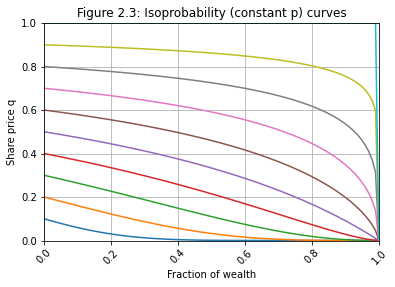

In [5]:
def SharePrice(f,p):
    #Price to pay when a fraction f of
    #wealth is invested in a gamble that pays 1 with probability
    #p and 0 otherwise, log-utility
    #See formula 2.16 above
    if (f<0) or (f>=1) or (p<=0) or (p>1): #Can't bet anything
        return(0.0)
    if (f==0.0):              #Limiting amount to be risk-neutral
        return(p)
    if (p==1.0):
        return(1.0)
    one_minus_f=1-f
    denom=one_minus_f**(1-1/p)-one_minus_f
    return(f/denom)
#Done with SharePrice

#Generate isoprobability graphs

frac_wealth = np.arange(0,1.01,.01) #compute at fractions of wealth
                                    #ranging from 0 to 1 by .01's
prob = np.arange(.1,1.1,.1) #Compute isoprobability curves every 10%
                            #of probability
#y is a list of lists - each contained list is an isoprobability curve
y=[[SharePrice(fw,pr) for fw in frac_wealth] for pr in prob]

#Display the graph
for i in range(len(prob)):    #Do each isoprobability line
    plt.plot(frac_wealth,y[i])

plt.xticks(rotation=45)
plt.grid()
plt.title('Figure 2.3: Isoprobability (constant p) curves')
plt.xlabel('Fraction of wealth')
plt.ylabel('Share price q')
plt.axis([0,1,0,1])
plt.show();

On the left are risk-neutral prices. Then, as the fraction of wealth at risk gets higher and higher, the risk premium gets bigger and bigger and the price goes down.

[QRPM R2.8] When making decisions with possible upsides, are most people (a) risk-averse; (b) risk-neutral; or (c) risk-seeking?

> Risk-averse.


# No-Arbitrage

Let W (for “win”) be a share of MiDCo – pays off \\$1 if MiDCo wins. Suppose there is a security L (for “lose”) that pays off \\$1 if MiDCo fails. In real life could be a put option on MiDCo. There is no risk in the combined position W+L. It is always worth \\$1 at the future time no matter what happens.

That doesn’t necessarily mean it’s worth \\$1 today. There can be a time value of money.

But let $R_f$ be the risk-free security, scaled to be worth \\$1 at the future time, e.g. 1-year US Tbill rate about 1.5\% so if time jump is 1yr, $R_f=1/(1.015)$ today. 

Then we must have $W+L = R_f$ because, if not, we buy the cheaper and sell the dearer “until our fingers bleed” (trader’s expression).

A trade where both sides of the trade have equivalent payoffs in all future states is called an “arbitrage trade”.

What could go possibly wrong with such a wonderful trade? The limits of arbitrage include trading costs (it’s not free to buy $W+L$ or to sell $R_f$, or vice versa), legal restrictions (the cheap thing might be in Country A and the dear thing in
Country B: is it legal to transfer across borders? permits?), taxes, transportation costs, storage costs, execution risk (one side of the trade falls through but you still owe the other side), counterparty risk (you pay someone for $W+L$ and they go bankrupt before delivering $W+L$), market disruptions can get worse before they get better, cost of capital...

But still, if there’s a big enough gap between two equivalent things, someone will
eventually step in and arb it (“Law of One Price”).

Generally, we will assume the principle of no-arbitrage: For any linear combination $\Sigma a_i x_i$ of securities $x_i$ where the current price of the combination is zero, then either (a) the price of the combination must be zero in all future states of the world; or (b) there must be at least one future state with a strictly positive price and at least one future state with a strictly negative price.

This definition still allows risk in an arb trade – e.g. costs 0 today, could be worth \\$1 in future state 1 and \\$3 in all other future states. That has risk – we don’t know how much free money we’re going to get. Still these trades are called “risk-free arbitrages.” The proper term is actually “peril-free arbitrage” because there is no chance anything bad will happen.

Whatever you call them, we (and virtually everyone else doing mathematical finance) are going to assume they don’t exist


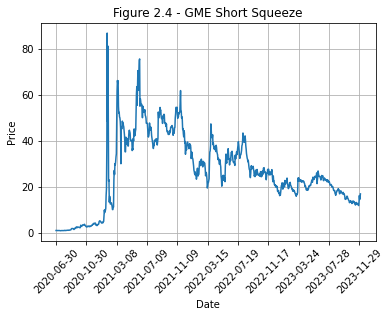

In [6]:
#Display GME short squeeze 2020-
import yfinance as yf
from datetime import datetime

tix = yf.Ticker("GME")
# get historical market data
hist = tix.history(period="max")

#Drop rows with any NaNs
hist = hist.dropna()

#Plot prices
start_date = datetime.strptime("2020-06-30", "%Y-%m-%d")
x=[]; y=[]
for i in range(len(hist.index)):
    hi_date=hist.index[i].to_pydatetime().replace(tzinfo=None)
    if hi_date>=start_date:
        x.append(hist.index[i].strftime("%Y-%m-%d"))           #dates
        y.append(hist.Close[i])                                #adjusted prices
i=np.arange(len(y))   #index
plt.plot(i,y)

#Display about 10 dates on the x axis
stride=int(len(y)/10)
plt.xticks(i[::stride],x[::stride],rotation=45)

plt.title("Figure 2.4 - GME Short Squeeze")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show();

In [7]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-28 00:00:00-05:00,11.900000,13.550000,11.890000,13.490000,14192900,0.0,0.0
2023-11-29 00:00:00-05:00,15.490000,17.559999,14.700000,16.250000,61172800,0.0,0.0
2023-11-30 00:00:00-05:00,16.290001,16.330000,14.320000,14.550000,16537200,0.0,0.0


[QRPM R2.9] If the price of $.995$ fine gold in New York were different than the price of $.995$ fine gold in London, it would appear that an arbitrageur could buy the cheaper and sell the dearer until the prices became the same. However in practice there are limits to such an arbitrage. Name three such limits to arbitrage. 

> Transaction costs, transportation costs, the passage of time during the transaction, taxes, regulatory restrictions, storage costs, counterparty risk, execution risk, cost of capital.

[QRPM R2.10] Name one of the costs of short selling that make the practice of short selling more frictive than the theory.

> Borrowing fees, dividends, margin maintenance, the usual transactions costs of buying and selling shares, and possible short squeezes.

[QRPM R2.11] Suppose we have a linear combination $a_1x_1+…+a_nx_n$ of securities $x_1,...,x_n$ where the current price of the combination is zero, and the price of the combination is not zero in some future state of the world. Under the no-arbitrage principle, what can be said about future prices of this linear combination?

> There must be at least one future state with a strictly positive price and at least one future state with a strictly negative price.


# State Prices and Risk-Neutral Probabilities

The idea of an indicator security like W or L that pays \\$1 in some future state of the world is similar to the atomic lotteries in VNM utility.

- If $\Omega=\{s_1,..,s_n\}$ is the sample space, than a security $x_i$ that pays \\$1 if outcome $s_i$ occurs and 0 otherwise is called a state-space security; an Arrow-Debreu contingent claim; or (in financial markets) a binary (or digital) option.

- Let $price(x_i)$ be the current price of state-space security $x_i$; we’ll use the notation $q_0(i)=price(x_i)$.

- If there is a complete set of state-space securities (i.e. covering all the outcomes in the sample space), then we know that $q_0(1)+...+q_0(n)=R_f$, i.e. the current prices of all the state-space securities must add to the current price of the risk-free security $R_f$.

- In that case, let $q_i=q_0(i)/R_f$ (i.e. something like $q_0(i)*(1.015)$). Assuming every future state has some chance of occurring, $q_i>0$ and $q_1+...+q_n=1$.

The $q$’s form the risk-neutral probability measure. One of the most confusing pieces of terminology ever, because if the q’s were risk-neutral they would equal the $p$’s, which are the market’s consensus views on natural or real-world probabilities that the state-space securities $x_i$ pay off.

The $q_0$’s are actually the market-clearing prices that take into account: the market’s aggregate assessment of natural probability p; and the market’s aggregate attitude toward risk in the payoffs; and the time value of money. So risk-neutral probability means “this would be the market consensus probability of $x_i$ paying off under the counterfactual assumption that all market participants are risk-neutral (after adjusting for the time value of money).”

The reason we focus on the risk-neutral probability measure is that it can be derived from observable prices, while to get the market consensus natural probability measure (which is what we really want to know), we’d have to conduct a very complete, minute-by-minute, poll of all market participants. Not gonna happen.

When we have continuous outcomes, the convention for time-value-of-money discounting is to use $R_f=exp(-tr_f)$ rather than $1/(1+r_f)^t$, which is the discrete convention. Here rf is the annual rate (like 1.5% now for one-year Tbills).


[QRPM R2.12] Suppose we have:
- A one-period world with a present (time $0$) period and a future period;
- All possible outcomes that have nonzero probability of occurring in the future period are contained in a finite sample space $\Omega$, but which $\omega\in\Omega$ will occur in the future period is not known in the present;
- For every $\omega\in\Omega$, there is an $\omega$-state price security that can be bought or sold in the current period for a price $q_0(\omega)$. The $\omega$-state price security will pay $\$1$ in the future period if state $\omega$ occurs, and $\$0$ otherwise;
- No-arbitrage.

What is the probability measure formed from the state price securities called?

> The risk-neutral probability measure.


# Stochastic Discount Factors

When the sample space is finite we can write

$$ price(0,X) = \sum X(\omega) q_0(\omega) = \frac{1}{1+r_f} \mathbb{E}_Q[X] $$

(using the discrete discounting convention and the assumption that t=1, along with no-arbitrage for the last equality). 

This tells us what the price of a security X should be today based on the atomic quantities $q_i$ and its known payoffs. If the price is different from this then there’s an arbitrage, i.e. free money. So, this is the formula for free money that you’ve been waiting for ;-)

Obviously, it’s not that easy. The pricing formula is logical but, to take advantage of it, you would need to have a complete set of atomic tradable statespace securities to trade against composite securities X. Something like that exists in options markets, where for example the pricing of the set of options on Tesla stock has to be consistent in a way dictated by the equation. The outcomes $\omega$ are the various possible price levels of Tesla. 

Spoiler alert: Options traders already know this and there isn’t anything to jump on. Still, it’s a good way to frame our thinking. For example, think about the (unknown) real-world probabilities $p_i$. We can define

$$ \mathbb{E}_P[X] = \sum X(\omega) p(\omega) $$

This is the expected value of $X$, one period forward, under the $P$ probability measure. To relate that to the current price, we can introduce a random variable $\varphi(\omega)=q_0(\omega)/p(\omega)$:

$$ \mathbb{E}_P[\varphi X] = \sum X(\omega) q_0(\omega) = \frac{1}{1+r_f} \mathbb{E}_Q[X] = price(0,X) $$

$\varphi$ is called a Stochastic Discount Factor (“SDF”). It’s a discount factor because it tells us how much to discount the future probability-weighted payoffs to get them in line with observed state-space prices.

So the SDF tells us how to translate between the weird risk-neutral probability and the intuitive real-world probability.

Only problem: we don’t have a clue what the SDF is. It is the ratio of something we might know (which might be observable from market prices) and a thing we can’t know (). So aren’t we just going in circles?

Pukthuanthong and Roll (“PR”) 2015: ... in academia "the Stochastic Discount Factor (SDF) has become a dominant paradigm in... asset pricing research." But SDF's are not widely used in financial practice, because "the empirical success of SDF theory is less apparent."

Fortunately recent work – some of it by PR and some other work by Stephen Ross – has moved SDF theory closer to real-world applicability.



[QRPM R2.13]
What is a formula for the current price $price(0,X)$ of a random variable $X$ in terms of the risk-neutral probability measure $Q$?

> The price is the discounted expectation under the risk-neutral probability measure, either $price(0,X)=\frac{1}{1+r_f}\mathbb{E}_{Q}[X]$ (discrete discounting convention) or 
$price(0,X)=exp(-r_f)\mathbb{E}_{Q}[X]$ (continuous discounting convention).

[QRPM R2.14]
Let $q_0(\omega)$ be the current price of the state price security that is worth $1$ in the future if state $\omega$ occurs, and $0$ otherwise. Let $p(\omega)$ be the real-world probability measure for future state $\omega$. What is the stochastic discount factor ("SDF") $\varphi(\omega)$ in terms of these functions?

> $$\varphi(\omega)=\frac{q_0(\omega)}{p(\omega)}$$


## The Hansen-Jagannathan bound

Playing around with what we’ve seen so far, we can say (assuming no-arbitrage):

$$ \mathbb{E}_P[\varphi] = \frac{1}{1+r_f} \mathbb{E}_Q[1] = price(0,X) = R_f $$

If we define $R_X=X/price(0,X)$ as the return relative (rate of return + 1) random variable, then

$$ \mathbb{E}_P[\varphi R_X] = 1 $$

For any return relative random variables X and Y, let the excess return of security (random variable) X over the expected return of the SDF (which is the return on $R_f$ under no-arbitrage) be $e_X = R_X - 1/\mathbb{E}_P (\varphi)$

* Covariances are important because they capture something important about the relationship between two securities, which we need to know if we’re going to assess the risks of a portfolio.

* SDF’s capture something about overall market risks. In particular, $cov_P(\varphi,e_X) = - \mathbb{E}_P (\varphi) \mathbb{E}_P (e_X)$

By definition, covariance is the product of correlation and the standard deviations of the two covariates

$$ cov_P(\varphi,e_X) = corr_P(\varphi,e_X)\sigma_P(\varphi)\sigma_P(e_X) \geq - \sigma_P(\varphi)\sigma_P(e_X)$$

Combining both expressions for the covariance:

$$ - \mathbb{E}_P (\varphi) \mathbb{E}_P (e_X) \geq - \sigma_P(\varphi)\sigma_P(e_X) $$

which can be rewritten as

$$ \frac{\sigma_P(\varphi)}{\mathbb{E}_P(\varphi)} \geq \frac{\mathbb{E}_P(e_x)}{\sigma_P(e_x)} $$

This inequality is called the Hansen-Jagannathan Bound. The value on the right is called the Sharpe Ratio of security X. Sharpe ratios can be estimated empirically. The expression on the left, which is a single market-wide expression involving only the SDF, is greater than the greatest Sharpe Ratio of any security.

If we have no-arbitrage, then the denominator on the LHS is known, and we have

$$ \sigma_P (\varphi) \geq e^{-r_f} \frac{\mathbb{E}_P(e_x)}{\sigma_P(e_x)} $$

This is a testable hypothesis! We can gather a large number of securities X, compute their Sharpe Ratios, take the max, and multiply by $e^{-r_f}$. That will give a lower bound on how volatile the SDF is, i.e. how much the $q_0/p$ adjustment varies cross-sectionally across all securities.



[QRPM R2.15]
Let $R_f$ be the current value of the risk-free security and let $e_X$ be the excess over risk-free return of a security (random variable) $X$. The Hansen-Jagannathan bound says that $R_f\frac{\mathbb{E}_P[e_X]}{\sigma(e_X)}$ is a lower bound for what quantity? 

> The standard deviation of the SDF, $\sigma(\varphi)$.


[QRPM R2.16]
What did Pukthuanthong and Roll find in their empirical tests of the Hansen-Jagannathan bound?

> It held ("comfortably").


[QRPM P2.5]
Read the file `ratio_data.xlsx` into a dataframe. The file contains monthly return relatives for 11 different companies. (I.e. $1.05$ means a $5\%$ rate of return for the month ending on the given date.) Divide the data into non-overlapping $10$-month periods: e.g. if there are $132$ months of data, use the most recent $13$ non-overlapping $10$-month periods. Compute and report the annualized Pukthuanthong-Roll SDF volatility (2.33) in each of these non-overlapping periods. (Multiply monthly volatility times $\sqrt{12}$ to annualize). Also compute the largest of the $11$ Sharpe ratios (again annualized) in each $10$ month period (assume riskfree rate is zero). Does it seem from this small sample that the Hansen-Jagannathan bound usually holds?


In [13]:
# [QRPM 2.5] Code to get ratio_data.xlsx from Yahoo! Finance

import yfinance as yf
import datetime as dt
import numpy as np

def LastYearEnd(yearof=None):
    #return YYYY-MM-DD date string
    #that is the last business day
    #of yearof. If no yearof, uses
    #the year before the current date.
    #If the last calendar
    #day is on a weekend, assumes the last
    #Friday is the last business day
    yearof=dt.date.today().year-1
    for day in [31,30,29,28]:
        l=dt.date(yearof,12,day)
        if l.weekday()<5:
            return(str(l.year)+'-12-'+str(day))

        
tix = yf.Tickers("TSLA XOM AAPL WMT ORCL ED F JPM AMZN JNJ V")
# get historical market data
hist = tix.history(period="max")

#Find latest year end
lastyear=LastYearEnd()

#Drop the rows with any NaNs
hist = hist.dropna()
#Save monthends only - is_month_end function does
#calendar monthends so doesn't work
#Also, drop anything after lastyear
drop_indexes=[]
for i in range(1,len(hist)):
    if (hist.index[i-1].month == hist.index[i].month) or \
        (hist.index[i-1].year > int(lastyear[:4])):
        drop_indexes.append(hist.index[i-1])
#Check last one
    if hist.index[-1].year > int(lastyear[:4]): drop_indexes.append(hist.index[-1])
#Drop the non-monthends
hist=hist.drop(drop_indexes)

#Compute return relatives
hist=np.exp(np.log(hist.Close).diff())

#Get rid of first record
hist=hist.drop(hist.index[0])

#Write it out, most recent to oldest
hist.iloc[::-1].to_excel('data/ratio_data.xlsx',engine="openpyxl")

print(int(len(hist)/10),"non-overlapping periods of 10 months")

[*********************100%***********************]  11 of 11 completed
15 non-overlapping periods of 10 months


In [22]:
# [QPRM P2.5]
import pandas as pd
import numpy as np

#Read in data and drop date column
df = pd.read_excel("data/ratio_data.xlsx",engine="openpyxl")
df = df.drop(['Date'], axis=1)

(T, securities)=df.shape
periods_per_segment = 10
segments=int(T/periods_per_segment)
str_print=f"Data has {T} time periods divided into {segments} segments"
str_print+=f" of {periods_per_segment} periods each."
print(str_print)

#Break up into "segments" non-overlapping periods
periods = np.array_split(df, segments)

for i,period in enumerate(periods): 
    p = period.values 
    # formula 2.53
    phi = len(p) * np.linalg.inv(p @ np.transpose(p)) @ p @ np.ones(len(p[0]))
    #Annualized SDF volatility (zero rf)
    sdf_vol = np.sqrt(12) * np.std(phi)
    #Annualized Sharpe ratio
    sharpes = np.sqrt(12) * (period.mean()-1.)/period.std(ddof=0)   #Default here is ddof=1
    str_print=f"In segment {i+1} the SDF volatility was {sdf_vol:{4}.{4}} and"
    str_print+=f" the maximum sharpe ratio was {max(sharpes):{4}.{4}}"
    print(str_print, sdf_vol > max(sharpes))


Data has 150 time periods divided into 15 segments of 10 periods each.
In segment 1 the SDF volatility was 6.832 and the maximum sharpe ratio was 1.393 True
In segment 2 the SDF volatility was 4.411 and the maximum sharpe ratio was 1.604 True
In segment 3 the SDF volatility was 19.18 and the maximum sharpe ratio was 2.928 True
In segment 4 the SDF volatility was 7.875 and the maximum sharpe ratio was 2.97 True
In segment 5 the SDF volatility was 5.578 and the maximum sharpe ratio was 2.248 True
In segment 6 the SDF volatility was 2.276 and the maximum sharpe ratio was 1.494 True
In segment 7 the SDF volatility was 7.395 and the maximum sharpe ratio was 4.441 True
In segment 8 the SDF volatility was 48.5 and the maximum sharpe ratio was 2.902 True
In segment 9 the SDF volatility was 10.17 and the maximum sharpe ratio was 2.098 True
In segment 10 the SDF volatility was 22.2 and the maximum sharpe ratio was 1.765 True
In segment 11 the SDF volatility was 11.05 and the maximum sharpe ratio

[QRPM P2.7] 
An **exceedance count** is the number of times an observation is outside VaR. If VaR is properly estimated, then (say) $95\%$ VaR should be exceeded only $5\%$ of the time. For example, if $95\%$ VaR is $2\%$, then (using the negative convention) losses over $2\%$ should only happen $5\%$ of the time. Let P be an equal-weighted portfolio of the 11 stocks in `ratio_data.xlsx`, rebalanced monthly, and let $F_P(x)$ be the empirical distribution of returns of $P$ during the first $60$ of the most recent $120$ months. (Sort the $60$ observations from lowest $x_1$ to highest $x_{60}$; $F_P(x_i)=\frac{i}{61}$.) How well does the $95\%$ monthly VaR based on $F_P(x)$ predict the number of exceedances in the most recent $60$ months (the holdout sample)?

> Code below - depends on time period but 5 year empiricals aren't usually very good for the next 5 years. For year-end 2021:
> ```
Empirical VaR from learning sample: 0.03753626154718459
Number, p-level of exceedances: 6 0.09836065573770492
> ```
> So about double the 3 or 4 expected. Note subtlety of dividing by 61 rather than 60 can account for a count difference of one.


In [23]:
# [QRPM P2.7]
import pandas as pd
import numpy as np

#Function to compute the VaR point in discrete distribution
def var_point(p,size):
    small=10**(-10)
    # See section 2.3.1 for arcana of discrete distributions
    vp=(1.-p)*(size+1)
    if (vp % 1) > small: vp+=1
    return(int(vp-1))  #subtract one to make it an index
#done with var_point

#Problem parameters
p=.95
total_sample_size=120
learning_sample_size=60
holdout_sample_size=total_sample_size-learning_sample_size

#Read in latest months of data
df = pd.read_excel("data/ratio_data.xlsx",nrows=total_sample_size,engine="openpyxl")
securities=len(df.columns)-1

#Get empirical distribution of learning sample
learning_sample=df[df.columns[1:]]    #Skip date column
learning_sample=learning_sample.sum(axis=1). \
    iloc[-learning_sample_size:].sort_values()
#Empirical VaR (as return relative)
learning_var=learning_sample.iloc[var_point(p,learning_sample_size)]/securities
print("Empirical VaR from learning sample:",1-learning_var)

#Check exceedances in holdout sample
holdout_sample=df[df.columns[1:]]    #Skip date column
holdout_sample=holdout_sample.sum(axis=1). \
    iloc[1:holdout_sample_size]/securities
exceedances=[h for h in holdout_sample if h<learning_var]
n_exceed=len(exceedances)
pct_exceed=n_exceed/(holdout_sample_size+1)
print("Number, p-level of exceedances:",n_exceed,pct_exceed)

Empirical VaR from learning sample: 0.029753062194049607
Number, p-level of exceedances: 11 0.18032786885245902


[QRPM P2.8]
Suppose that your trading desk invests $\$1$ billion each month in the equal-weighted portfolio of the $11$ companies in `ratio_data.xlsx`. Further suppose that the current time is December 31 of the year that ends one year before the last year in `ratio_data.xlsx`. As the risk manager for this desk, you must specify at the current time a buffer amount of money to set aside that will equal the worst monthly loss in the coming year. You will be fired if you set aside too much or too little by more than $\$10$ million. Based on the metrics discussed, how much should you set aside at the current time to maximize your chances of keeping your job? Would you have kept your job at the end of the most recent year?

> Based on the problem description, you want to estimate $1-\frac{1}{12}$ monthly cVaR. (We actually space empirical distributions by $\frac{1}{n+1}$ so this may be a little off, but close enough for problem purposes.)
> 
> The most straightforward way to do this is to estimate $1-\frac{1}{12}$ monthly cVaR based on the learning sample of data in the first $108$ months.
> 
> From end-2021 data:
>```
Empirical VaR (rate of return/month) from learning sample: 0.03753624068710437
Empirical cVaR (rate of return/month): 0.06610561830230366
Buffer set aside at end of previous year: 66,105,618
Total empirical losses in holdout: 0
Number of exceedances in holdout: 0
Difference on 1,000,000,000: 66,105,618
You lost your job
>```
>
> 2022 is much worse...

In [24]:
# [QRPM P2.8]
# Compute cVaR over learning sample. Just use df dataframe and other variables from [QRPM P2.7]

holdout_sample_size=12
learning_sample_size=total_sample_size-holdout_sample_size

p=1.-1/12.
desk_investment = 10**9

#Get empirical distribution of learning sample
learning_sample=df[df.columns[1:]]    #Skip date column
learning_sample=learning_sample.sum(axis=1).iloc[-learning_sample_size:].sort_values()
#Empirical VaR (as return relative)
learning_vp=var_point(p,learning_sample_size)
learning_var=learning_sample.iloc[learning_vp]/securities
print("Empirical VaR (rate of return/month) from learning sample:",1-learning_var)

#Get empirical cVaR
learning_cvar=(learning_sample.iloc[:learning_vp+1].sum()/securities)/(learning_vp+1)
print("Empirical cVaR (rate of return/month):",1-learning_cvar)

#Empirical distribution of holdout sample
holdout_sample=df[df.columns[1:]]
holdout_sample=holdout_sample.sum(axis=1).iloc[:holdout_sample_size]/securities
buffer=desk_investment*(1-learning_cvar)
print(f"Buffer set aside at end of previous year: {buffer:,.0f}")

#Compare with actual
exceedances=[h-1 for h in holdout_sample if h<learning_var]
exc_count=sum([1 for h in holdout_sample if h<learning_var])
holdout_losses=np.abs(sum(exceedances))*desk_investment
print(f"Total empirical losses in holdout: {holdout_losses:,.0f}")
print(f"Number of exceedances in holdout: {exc_count:,.0f}")

#Difference
monetary_diff=np.abs(buffer-holdout_losses)
print(f"Difference on {desk_investment:,.0f}: {monetary_diff:,.0f}")
if monetary_diff > 10**7:
    print("You lost your job")
else:
    print("You kept your job")

Empirical VaR (rate of return/month) from learning sample: 0.0340534969000722
Empirical cVaR (rate of return/month): 0.0638746801397796
Buffer set aside at end of previous year: 63,874,680
Total empirical losses in holdout: 396,468,623
Number of exceedances in holdout: 5
Difference on 1,000,000,000: 332,593,943
You lost your job


## The Ross Recovery Theorem

Stephen Ross (BS 65 physics Caltech; Yale and MIT professor until his death in 2017) attempted to “recover” the market consensus probabilities “p” from the observed state-space (risk-neutral) probabilities “q.” Since as we’ve noted both risk preferences and probability estimates are embodied in observable prices, how can they be disentangled?

- Ross makes some assumptions that allow him to disentangle the two. They’re along the lines of the VNM or ADEH assumptions – reasonable but strong.

- He, like PR, also uses both time and the cross-section to get enough data to form estimates.

- Ross assumes Calendar Independence: the state price is the same in January 2009 as it is in January 2019. Similarly for (unknown) real-world probability. Strong assumption – certainly not true, in fact. 

- Another assumption is Transition Independence: it says there is a certain functional form to the SDF. The functional form as a ratio is a choice that essentially rests on the same VNM assumptions about rationality that are used in utility theory.

There are n states in the sample space. Let 

- Q be the (hopefully) observable nxn state transition risk-neutral probability matrix. 

- D be the unknown nxn diagonal matrix with in the ith place on the diagonal and zeroes elsewhere. 

- P be the unknown nxn state transition real-world probability matrix. 

Then the assumptions so far can be repackaged as... 

$$ DQ = \delta P D$$

Solving for the desired quantity P we have

$$ P = \frac{1}{\delta} D Q D^{-1} $$

which may not seem very helpful since we still don’t know D or so too few equations in too many unknowns. But we do know that $Pu=u$ where $u$ is the unit vector of all ones. Hence 

$$ u = \frac{1}{\delta} D Q D^{-1} u $$

And, therefore

$$ \delta D^{-1} u = Q D^{-1} u $$

If we define $z = D^{-1} u$,

$$ \delta z = Q z $$

In other words, z is an eigenvector of Q with associated eigenvalue $\delta$.

There is a theorem – Perron-Frobenius – that tells us about the eigensystem of matrices like Q (real square matrices with positive entries). The theorem says there is at least one positive real eigenvalue, and that the eigenvector associated with the
largest real eigenvalue is all positive (or all negative, but just multiply by -1). Further, the theorem says that there are no other all-positive eigenvectors.

D is positive, so Q is positive, so that single all-positive eigenvector is the only candidate that can equal z. Thus its associated eigenvalue must be $\delta$. Invocation of Perron-Frobenius thus solves the “too many unknowns” problem.

This allows trading strategies to be built on recovered probabilities.

For example, [Audrino, Huitema, and Ludwig 2015] use a neural network approach to fill in Q from observed options prices. They then investigate trading strategies based on the Ross-recovered moments of the P-distribution of S&P 500 returns. They find that such trading strategies perform better than strategies based on the moments of the risk-neutral distribution Q. Thus this recent work has the potential to move SDF's from the academic world to the practitioner world.

Another use: cross-market trading. If we can separate risk premium from probability, we can compare (say) bonds from Company X and stock from Company X to see if the probabilities and risk premia are the same.

[QRPM R2.17]
What were the two major independence assumptions made by Stephen Ross in order to prove the Ross Recovery Theorem?

> * Calendar independence: doesn't matter when you transition from state $\omega_0$ to state $\omega$, probability is always the same. 
>
> * Transition independence: transition SDF can be written in the specific form $\varphi(\omega_0,\omega)=\delta\frac{h(\omega)}{h(\omega_0)}$.


[QRPM R2.18]
What theorem from matrix theory does Stephen Ross invoke in the course of proving the Ross Recovery Theorem?

> Perron-Frobenius Theorem @ [Wikipedia](https://en.wikipedia.org/wiki/Perron%E2%80%93Frobenius_theorem)


[QRPM R2.19]
In Jackwerth and Menner's empirical tests, what did they conclude about the hypothesis that future returns are drawn from Ross-recovered distributions?

> They rejected the hypothesis.

# References

* Kenneth J. Winston: Quantitative Risk and Portfolio Management, Cambridge University Press, 2022. ISBN 978-1-009-20904-5

* Kuntara Pukthuanthong (University of Missouri) &amp; Richard Roll (California Institute of Technology): "Agnostic Tests of Stochastic Discount Factor Theory," technical report, 2015.

* Steve Ross. "The Recovery Theorem," The Journal of Finance, Volume 70, Issue 2, April 2015, Pages 615-648. DOI [10.1111/jofi.12092](https://doi.org/10.1111/jofi.12092)

* Francesco Audrino, Robert Huitema &amp; Markus Ludwig: "An Empirical Analysis of the Ross Recovery Theorem," SSRN, February 2015. SSRN [2433170](https://ssrn.com/abstract=2433170). DOI [10.2139/ssrn.2433170](http://dx.doi.org/10.2139/ssrn.2433170)

* Carsten Jackwerth &amp; Marco Menner: "Does the Ross recovery theorem work empirically?", Journal of Financial Economics. Volume 137, Issue 3, September 2020, Pages 723-739. DOI [10.1016/j.jfineco.2020.03.006](https://doi.org/10.1016/j.jfineco.2020.03.006)
